# Heat Equation in 1D [Optional]

## Objective

- Solving a Partial Differential Equation (PDE) using a simple time stepping

## Resources

- [Partial Differential Equation](https://en.wikipedia.org/wiki/Partial_differential_equation)
- [Numerical methods for partial differential equations](https://en.wikipedia.org/wiki/List_of_numerical_analysis_topics#Numerical_methods_for_partial_differential_equations)

## Partial Differential Equations (PDEs)

In case of heat "moving" along a medium, say along one direction, $x$ (1-D heat equation), the ordinary differential equation turns into a partial differential equation.

$$
\frac{\partial u}{\partial t} = - \frac{1}{c\rho}\frac{\partial}{\partial x}(-k \frac{\partial u}{\partial x}) = \alpha \frac{\partial^2 u}{\partial x^2}
$$

where $c$ is a specfic heat capacity of the medium with density $\rho$. $\alpha$ is called thermal diffusivity.

Most PDEs require numerical methods, or solvers. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

CFL=0.1


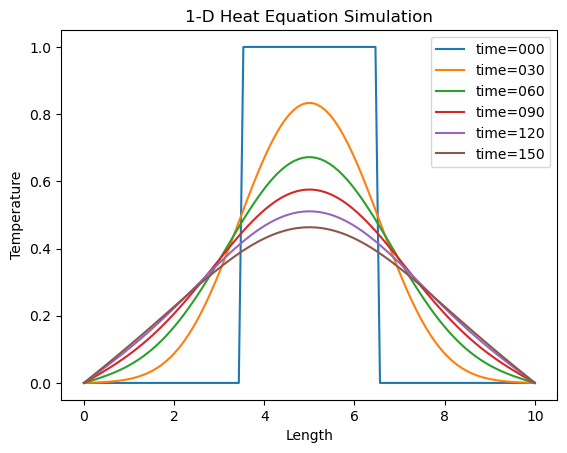

In [2]:
# Parameters
L = 10.0      # Length of the rod
T = 150.0     # Total time
N = 100       # Number of spatial points
M = 2000      # Number of time steps
alpha = 0.02  # Thermal diffusivity


# Discretization
dx = L / (N - 1)
dt = T / M

# Initial condition
u = np.zeros(N)
u_new = np.zeros(N)
u[int(3.5*N/L):int(6.5*N/L)] = 1.0  # Initial temperature pulse

K = 5 # Number of snapshots

K2 = 10 # Number of animation snapshots
u_values = np.zeros((M+1,N))

print(f"CFL={alpha*dt/(dx**2):.1f}")

# Time-stepping loop
for j in range(M+1):
    # if j % (M//K2) == 0:
    u_values[j,:] = u
    if j % (M//K) == 0:
        # Plot the temperature distribution
        plt.plot(np.linspace(0, L, N), u, label=f"time={int(dt*j):03}")
    for i in range(1, N - 1):
        u_new[i] = u[i] + alpha * dt * (u[i+1] - 2*u[i] + u[i-1])/dx**2
    # u_new[0] = u_new[1]
    # u_new[-1] = u_new[-2]

    u, u_new = u_new, u


plt.legend()
plt.xlabel('Length')
plt.ylabel('Temperature')
plt.title('1-D Heat Equation Simulation');

## Creating an animation

In [3]:
from matplotlib import animation
from IPython.display import HTML

inc = 20
u_subset = u_values[::inc,:]

fig, ax = plt.subplots(1,1)
ax.axis([-1,11,-0.05,1.05])
x = np.linspace(0, L, N)
l, = ax.plot([],[])
ax.plot(x,u_subset[0,:],'k--')

def animate(i):
    l.set_data(x, u_subset[i,:])
    ax.set_title(f"timestep: {i*inc:04}")
    return l,

anim = animation.FuncAnimation(fig, animate, frames=u_subset.shape[0], blit=True)
plt.close()

In [4]:
HTML(anim.to_html5_video())